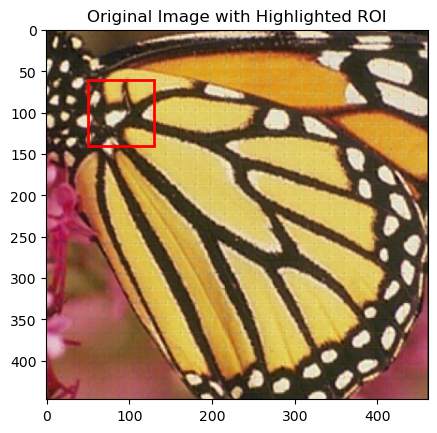

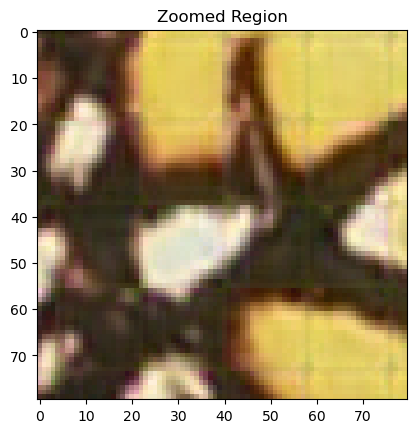

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the image
image = plt.imread(r"C:\Users\91995\OneDrive\Desktop\ESCPN++\TestImg\ESPCN++.png")

# Define the region of interest (ROI) with a larger area
x, y, w, h = 50, 60, 80, 80  # Increased ROI size

# Plot the original image with the highlighted ROI
fig, ax = plt.subplots(1)
ax.imshow(image)

# Add a rectangle to highlight the ROI
rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)
ax.set_title("Original Image with Highlighted ROI")

# Create a zoomed inset
roi = image[y:y+h, x:x+w]
fig_zoom, ax_zoom = plt.subplots(1)
ax_zoom.imshow(roi)
ax_zoom.set_title("Zoomed Region")

# Display both plots
plt.show()

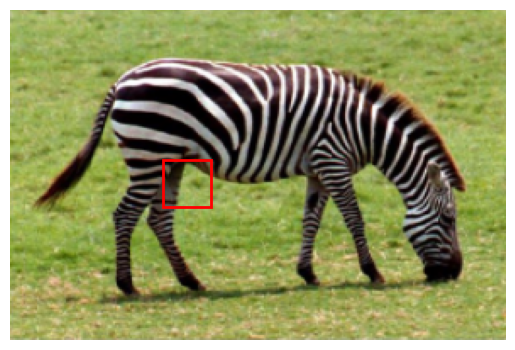

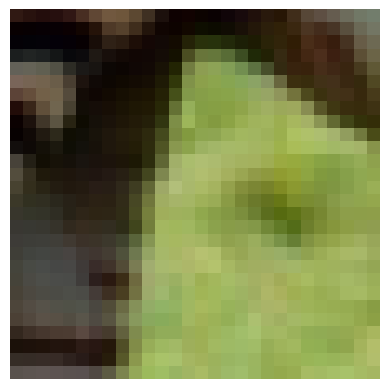

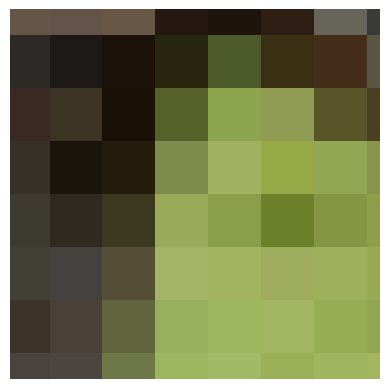

Images saved at:
C:\Users\91995\OneDrive\Desktop\ESCPN++\TestImg\Low REs\original_with_roi.png
C:\Users\91995\OneDrive\Desktop\ESCPN++\TestImg\Low REs\hr_zoomed_region.png
C:\Users\91995\OneDrive\Desktop\ESCPN++\TestImg\Low REs\lr_zoomed_region.png


In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import os

# Load the high-resolution image
hr_image_path = r"C:\Users\91995\OneDrive\Desktop\ESCPN++\TestImg\Low REs\lr_Set14.png"
hr_image = plt.imread(hr_image_path)

# Define the region of interest (ROI) with a larger area
x, y, w, h = 90, 88, 28, 28# Slightly larger ROI coordinates

# Create the low-resolution version of the image
lr_image = cv2.resize(hr_image, (hr_image.shape[1] // 4, hr_image.shape[0] // 4), interpolation=cv2.INTER_AREA)
lr_image = cv2.resize(lr_image, (hr_image.shape[1], hr_image.shape[0]), interpolation=cv2.INTER_NEAREST)

# Determine the save directory (same as the HR image directory)
save_dir = os.path.dirname(hr_image_path)

# Plot the original HR image with the highlighted ROI and save it
fig, ax = plt.subplots(1)
ax.imshow(hr_image)
rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)
ax.axis('off')  # Remove the grid and axes
original_path = os.path.join(save_dir, "original_with_roi.png")
plt.savefig(original_path, bbox_inches='tight', pad_inches=0)  # Save the original image with highlighted ROI

# Extract the ROI from HR and LR images
hr_roi = hr_image[y:y+h, x:x+w]
lr_roi = lr_image[y:y+h, x:x+w]

# Save the HR zoomed region
fig_zoom_hr, ax_zoom_hr = plt.subplots(1)
ax_zoom_hr.imshow(hr_roi)
ax_zoom_hr.axis('off')  # Remove the grid and axes
hr_zoom_path = os.path.join(save_dir, "hr_zoomed_region.png")
plt.savefig(hr_zoom_path, bbox_inches='tight', pad_inches=0)  # Save the HR zoomed region

# Save the LR zoomed region
fig_zoom_lr, ax_zoom_lr = plt.subplots(1)
ax_zoom_lr.imshow(lr_roi)
ax_zoom_lr.axis('off')  # Remove the grid and axes
lr_zoom_path = os.path.join(save_dir, "lr_zoomed_region.png")
plt.savefig(lr_zoom_path, bbox_inches='tight', pad_inches=0)  # Save the LR zoomed region

# Display all plots for reference
plt.show()

print(f"Images saved at:\n{original_path}\n{hr_zoom_path}\n{lr_zoom_path}")


In [3]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2

def load_and_create_lr_image(input_image_path, output_directory, scale_factor=0.5, target_size=None):
    # Load the image
    img = Image.open(input_image_path).convert('RGB')
    img_array = np.array(img, dtype=np.uint8)
    
    # Convert the image to tensor
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.uint8)
    img_tensor = tf.cast(img_tensor, tf.float32) / 255.0
    
    # Resize to target size if specified
    if target_size:
        img_tensor = tf.image.resize(img_tensor, target_size, method='area')
    
    # Create the low-resolution image (downscale the image)
    original_height, original_width, _ = img_array.shape
    lr_height = int(original_height * scale_factor)
    lr_width = int(original_width * scale_factor)
    img_lr = tf.image.resize(img_tensor, (lr_height, lr_width), method='area')
    
    # Convert the tensor back to uint8
    img_lr_array = tf.cast(img_lr * 255.0, tf.uint8).numpy()

    # Convert to YUV color space (if needed)
    img_yuv = cv2.cvtColor(img_lr_array, cv2.COLOR_RGB2YUV)
    
    # Save the low-resolution image in the specified directory
    lr_filename = f"lr_{os.path.basename(input_image_path)}"
    lr_img_path = os.path.join(output_directory, lr_filename)
    lr_img = Image.fromarray(img_lr_array)
    lr_img.save(lr_img_path)
    
    print(f"Low-resolution image saved at: {lr_img_path}")

    return img_yuv  # Return the YUV version (if needed for further processing)

# Example usage
input_image_path = r"C:\Users\91995\OneDrive\Desktop\ESCPN++\TestImg\U100.png"
output_directory = r"C:\Users\91995\OneDrive\Desktop\ESCPN++\TestImg\Low REs"
load_and_create_lr_image(input_image_path, output_directory, scale_factor=0.5, target_size=(256, 256))


Low-resolution image saved at: C:\Users\91995\OneDrive\Desktop\ESCPN++\TestImg\Low REs\lr_U100.png


array([[[  4, 129, 124],
        [  4, 129, 124],
        [  6, 129, 124],
        ...,
        [137, 169,  75],
        [133, 170,  71],
        [133, 170,  71]],

       [[  5, 129, 124],
        [  5, 129, 124],
        [  5, 129, 125],
        ...,
        [135, 169,  71],
        [142, 170,  70],
        [142, 170,  70]],

       [[  8, 129, 123],
        [  8, 129, 123],
        [  6, 129, 125],
        ...,
        [139, 166,  72],
        [147, 165,  73],
        [147, 165,  73]],

       ...,

       [[  0, 128, 128],
        [  0, 128, 128],
        [  0, 128, 128],
        ...,
        [ 43, 116, 139],
        [ 49, 112, 143],
        [ 49, 112, 143]],

       [[  0, 128, 128],
        [  0, 128, 128],
        [  0, 128, 128],
        ...,
        [ 30, 121, 134],
        [ 42, 115, 139],
        [ 42, 115, 139]],

       [[  0, 128, 128],
        [  0, 128, 128],
        [  0, 128, 128],
        ...,
        [ 14, 126, 132],
        [ 28, 121, 133],
        [ 28, 121, 133]]